In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re

In [2]:
with open('../data/day_12_puzzle_1', 'r') as f:
    input_data = f.readlines()

In [3]:
simple_example = """
start-A
start-b
A-c
A-b
b-d
A-end
b-end
"""

advanced_example = """
dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc
"""

input_data = simple_example.split('\n')
# input_data = advanced_example.split('\n')

In [4]:
paths = [path.replace('\n', '').strip() for path in input_data if len(path) > 0]
paths[:5]


['start-A', 'start-b', 'A-c', 'A-b', 'b-d']

In [5]:
g = nx.parse_adjlist(paths, delimiter='-')

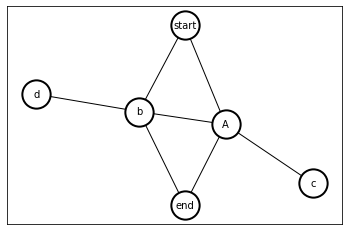

In [6]:
options = {
    "font_size": 10,
    "node_size": 800,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 1,
}

fixed_positions = {'start': (20,100), 'end': (20, 0)}
fixed_nodes = ['start', 'end']

layout = nx.spring_layout(g, seed=169, fixed=fixed_nodes, pos=fixed_positions)
nx.draw_networkx(G=g, pos=layout, **options)
plt.show()

In [7]:
def depth_first_search(graph: nx.Graph, location: str, paths: list = []):
    if location == 'end':
        paths[-1] += ',' + location
        paths.append('start')
        location = 'start'
        print('found an end, returning')
        return
        # return paths
    if location == 'start':
        paths.append('start')
    else:
        paths[-1] += ',' + location
    # if re.search('[A-Z].*', location):
    #     pass
    neighbors = [n for n in graph.neighbors(location)]
    print(f"{location:5s} -> {','.join(neighbors):10s}")
    for neighbor in neighbors:
        print(f'exploring neighbor {neighbor:5s} | current path [{paths[-1]:20s}]')
        if re.search('[a-z].*', location) and location != 'start':
            if location in paths[-1].split(','):
                print(f'skipping: {location}')
                continue
        if neighbor == 'start':
            continue
        depth_first_search(graph=graph, location=neighbor, paths=paths)
    return paths

In [8]:
depth_first_search(graph=g, location='start')

start -> A,b       
exploring neighbor A     | current path [start               ]
A     -> start,c,b,end
exploring neighbor start | current path [start,A             ]
exploring neighbor c     | current path [start,A             ]
c     -> A         
exploring neighbor A     | current path [start,A,c           ]
skipping: c
exploring neighbor b     | current path [start,A,c           ]
b     -> start,A,d,end
exploring neighbor start | current path [start,A,c,b         ]
skipping: b
exploring neighbor A     | current path [start,A,c,b         ]
skipping: b
exploring neighbor d     | current path [start,A,c,b         ]
skipping: b
exploring neighbor end   | current path [start,A,c,b         ]
skipping: b
exploring neighbor end   | current path [start,A,c,b         ]
found an end, returning
exploring neighbor b     | current path [start               ]
b     -> start,A,d,end
exploring neighbor start | current path [start,b             ]
skipping: b
exploring neighbor A     | current path

['start,A,c,b,end', 'start,b']

In [13]:
source = 'start'
target = 'end'
paths = []

def find_paths(graph: nx.Graph, source: str, target: str, paths: list = []):
    if len(paths) == 0:
        # if we're just beginning set the start to source
        last_steps = [source]
    else:
        # look for unfinished paths
        last_steps = [p[-1] for p in paths]
        print(paths, last_steps)
        return

    skipped = 0
    for ind, step in enumerate(last_steps):
        print(ind,step)
        if step == target:
            skipped += 1
            continue
        for neighbor in graph.neighbors(step):
            if step == target:
                paths[ind] += [target]
                break            
            paths[ind] += [neighbor]
            print(neighbor, paths)
    if not skipped == len(last_steps):
        find_paths(graph, source, target, paths)
    else:
        return paths

find_paths(g, source, target)

0 start


IndexError: list index out of range